In [1]:
import numpy as np
import rosatX as rx
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import rc

from getdist import plots, loadMCSamples

rc("font", **{"family": "sans-serif", "sans-serif": ["Helvetica"]})
rc("text", usetex=True)

#my_colours = ["#4DAF4A", "#377EB8", "#984EA3", "#E41A1C", "#FF7F00"]
my_colours = ["#4DAF4A", "#377EB8", "#984EA3", "#FF7F00", "black"]

params_all = ["lMc", "gamma", "alpha_T", "eta_b"]

## 1. Read all chains

In [2]:
chains_all = loadMCSamples("chains_cobaya/chain_cobaya_all",
                           settings={"ignore_rows": 0.2})
chains_0 = loadMCSamples("chains_cobaya/chain_cobaya_bin0",
                           settings={"ignore_rows": 0.2})
chains_1 = loadMCSamples("chains_cobaya/chain_cobaya_bin1",
                           settings={"ignore_rows": 0.2})
chains_2 = loadMCSamples("chains_cobaya/chain_cobaya_bin2",
                           settings={"ignore_rows": 0.2})
chains_3 = loadMCSamples("chains_cobaya/chain_cobaya_bin3",
                           settings={"ignore_rows": 0.2})

## 2. Plot constraints

### Triangle plot

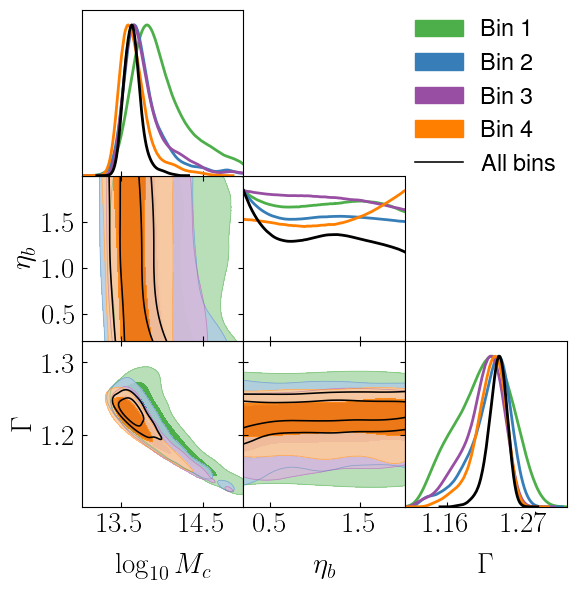

In [3]:
g = plots.get_subplot_plotter()
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 24
g.settings.linewidth = 2
g.settings.figure_legend_frame = False
g.triangle_plot(
    [chains_0, chains_1, chains_2, chains_3, chains_all],
    ["lMc", "eta_b", "gamma"],
    filled=[True, True, True, True, False],
    legend_labels=[f"Bin {i+1}" for i in range(4)] + ["All bins"],
    contour_colors=my_colours,
    line_args=[{"lw": 2, "color": my_colours[i]} for i in range(5)])

plt.savefig("Plots/triangle_main.pdf")

### Rectangle plot

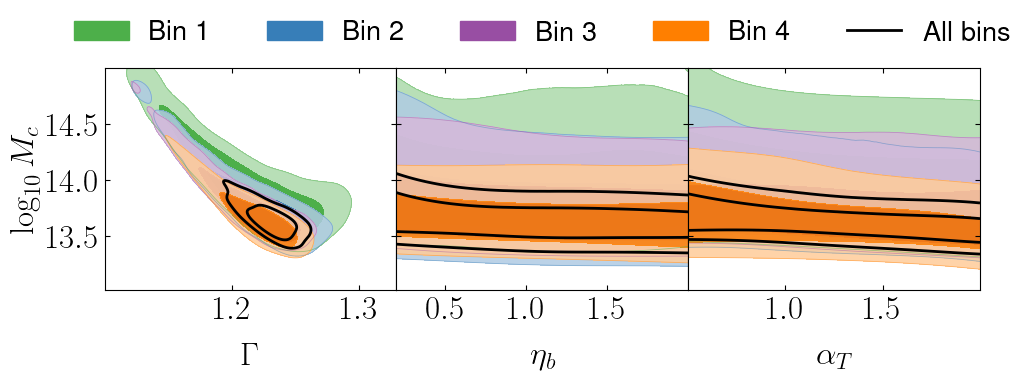

In [4]:
g = plots.get_subplot_plotter()
g.settings.fig_width_inch = 10
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 24
g.settings.linewidth = 2
g.settings.figure_legend_frame = False
g.rectangle_plot(
    ["gamma", "eta_b", "alpha_T"],
    "lMc",
    roots=[chains_0, chains_1, chains_2, chains_3, chains_all],
    filled=[True, True, True, True, False],
    legend_labels=[f"Bin {i+1}" for i in range(4)] + ["All bins"],
    contour_colors=my_colours,
    line_args=[{"lw": 2, "color": my_colours[i]} for i in range(5)])

plt.savefig("Plots/rectangle_main.pdf", bbox_inches="tight")

## 3. $C_\ell$ plot

In [5]:
lc = rx.ROSATxLike(params_vary=params_all,
                   bins=[0, 1, 2, 3])

imin = np.argmin(chains_all["chi2"])

theory = lc.get_model(
            lMc=chains_all["lMc"][imin],
            gamma=chains_all["gamma"][imin],
            eta_b=chains_all["eta_b"][imin],
            alpha_T=chains_all["alpha_T"][imin])

12.182813278318346 24 0.9777691999039733
13.281275785306208 24 0.9612561917730053
10.33065707521224 24 0.9930427821249603
9.748414904080063 24 0.9955081651100897


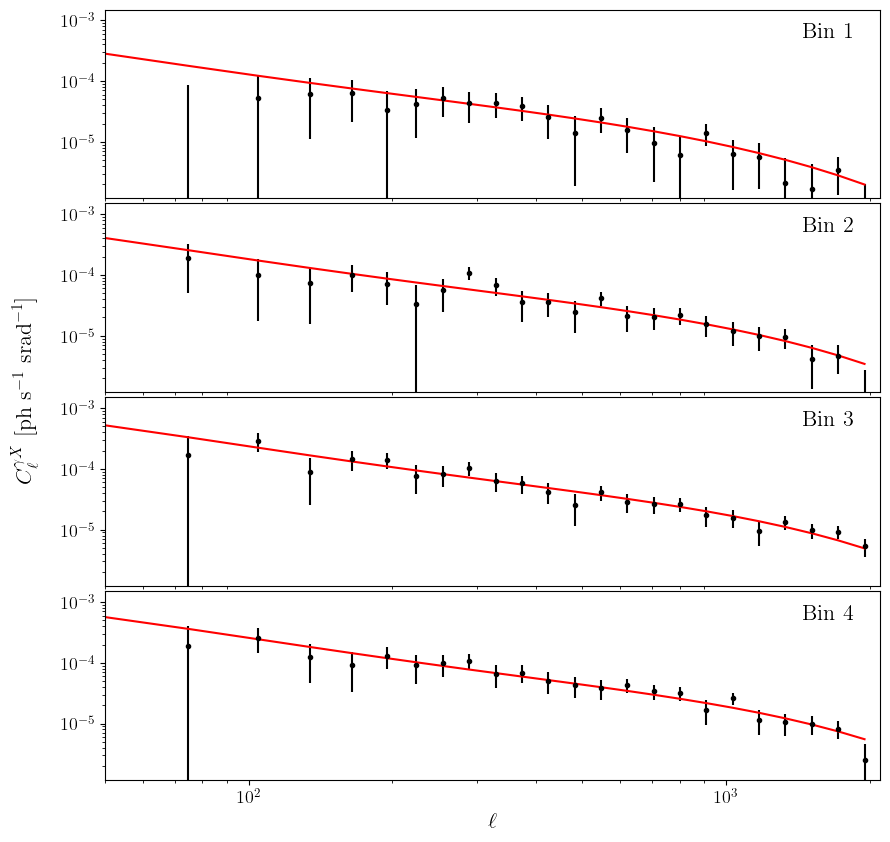

In [6]:
mosaic = """
A
B
C
D
"""

fig, axes = plt.subplot_mosaic(mosaic=mosaic, figsize=(10, 10))
plt.subplots_adjust(hspace=0.03, wspace=0.03)
for i, a in enumerate(["A", "B", "C", "D"]):
    ax = axes[a]
    clm = lc.cl_meta[i]
    cl_theory = theory[i]
    r = clm["cld"] - cl_theory
    chi2 = np.dot(r, np.linalg.solve(clm["cov"], r))
    print(chi2, len(cl_theory), 1 - st.chi2.cdf(chi2, len(cl_theory)))
    ax.errorbar(clm["ls"],
                clm["cld"],
                yerr=np.sqrt(np.diag(clm["cov"])), fmt="k.")
    ax.plot(clm["ls"], cl_theory, "r-")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylim([1.2e-6, 1.5e-3])
    ax.set_xlim([50, 2100])
    ax.tick_params(axis="both", labelsize=13)
    ax.text(0.9, 0.85,
            r"${\rm Bin\,\,%d}$" % (i + 1),
            transform=ax.transAxes,
            fontsize=16)
axes["A"].set_xticks([])
axes["B"].set_xticks([])
axes["C"].set_xticks([])
axes["D"].set_xlabel(r"$\ell$", fontsize=16)

fig.supylabel(
    r"$C_\ell^{\gamma X}\,\,[{\rm ph\,\,s^{-1}\,\,{\rm srad}^{-1}}]$",
    fontsize=16,
    x=0.03)

plt.savefig("Plots/allcl.pdf", bbox_inches="tight")

### Compact plot

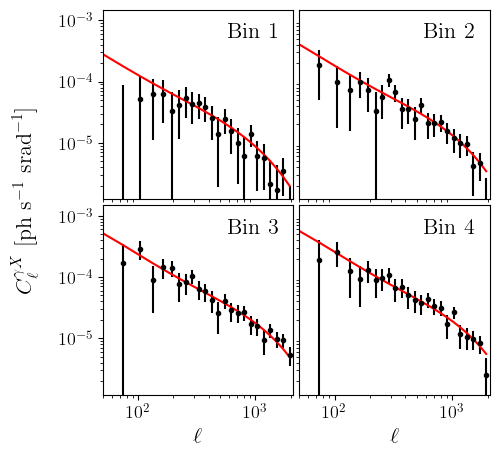

In [7]:
mosaic = [["A", "B"],
          ["C", "D"]]

fig, axes = plt.subplot_mosaic(mosaic=mosaic, figsize=(5, 5))
plt.subplots_adjust(hspace=0.03, wspace=0.03)
for i, a in enumerate(["A", "B", "C", "D"]):
    ax = axes[a]
    clm = lc.cl_meta[i]
    cl_theory = theory[i]
    ax.errorbar(clm["ls"],
                clm["cld"],
                yerr=np.sqrt(np.diag(clm["cov"])), fmt="k.")
    ax.plot(clm["ls"], cl_theory, "r-")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylim([1.2e-6, 1.5e-3])
    ax.set_xlim([50, 2100])
    ax.tick_params(axis="both", labelsize=13)
    ax.text(0.65, 0.85,
            r"${\rm Bin\,\,%d}$" % (i + 1),
            transform=ax.transAxes,
            fontsize=16)
axes["A"].set_xticks([])
axes["B"].set_xticks([])
axes["B"].set_yticks([])
axes["D"].set_yticks([])

fig.supylabel(
    r"$C_\ell^{\gamma X}\,\,[{\rm ph\,\,s^{-1}\,\,{\rm srad}^{-1}}]$",
    fontsize=16,
    x=-0.06)
for m in ["C", "D"]:
    axes[m].set_xlabel(r"$\ell$", fontsize=16)

#plt.savefig("Plots/allcl_2x2.pdf", bbox_inches="tight")

### Parameter constraints

In [8]:
print("     ", 
      "$\log_{10}M_c$",
      "$\Gamma$",
      "$\chi^2_{\\text{min}}$",
      "PTE",
      "$S/N$", "\n")

for chains, bins, d in zip(
    [chains_all, chains_0, chains_1, chains_2, chains_3],
    [[0, 1, 2, 3], [0], [1], [2], [3]],
    ["All bins", "Bin 1", "Bin 2", "Bin 3", "Bin 4"]):

    # Find minimum chi2
    imin = np.argmin(chains["chi2"])
    chi2 = chains["chi2"][imin]

    # Get theory at minimum chi2
    lc = rx.ROSATxLike(params_vary=params_all,
                       bins=bins)
    theory = np.concatenate(
        lc.get_model(
            lMc=chains["lMc"][imin],
            gamma=chains["gamma"][imin],
            eta_b=chains["eta_b"][imin],
            alpha_T=chains["alpha_T"][imin])).flatten()
    data = lc.data

    # Get S/N
    chi2_0 = np.dot(data, np.dot(lc.inv_cov, data))
    sn = np.sqrt(chi2_0 - chi2)
    sn_t = "%.1lf" % sn
    pte = 1 - st.chi2.cdf(chi2, len(data) - 4)
    chi2_st = "%.1lf" % chi2
    pte_st = "%.2lf" % pte
    lMc_st = chains.getLatex("lMc")
    gamma_st = chains.getLatex("gamma")
    
    print(d, "\n", lMc_st, gamma_st, chi2_st, pte_st, sn_t, "\n")

      $\log_{10}M_c$ $\Gamma$ $\chi^2_{\text{min}}$ PTE $S/N$ 

All bins 
 \log_{10}M_c = 13.643^{+0.081}_{-0.12} \Gamma = 1.231^{+0.015}_{-0.011} 80.8 0.79 20.0 

Bin 1 
 \log_{10}M_c = 13.99^{+0.19}_{-0.42} \Gamma = 1.211^{+0.046}_{-0.034} 16.6 0.68 6.4 

Bin 2 
 \log_{10}M_c = 13.79^{+0.10}_{-0.29} \Gamma = 1.219^{+0.035}_{-0.018} 24.5 0.22 10.0 

Bin 3 
 \log_{10}M_c = 13.797^{+0.092}_{-0.31} \Gamma = 1.210^{+0.036}_{-0.018} 19.0 0.52 13.8 

Bin 4 
 \log_{10}M_c = 13.668^{+0.096}_{-0.21} \Gamma = 1.219^{+0.026}_{-0.015} 24.2 0.23 12.2 



## 4. BAHAMAs constraints

In [9]:
BAHAMAS = np.load("data/constraints_1d.npz")
probs = np.exp(-0.5 * (BAHAMAS["chi2"] - np.amin(BAHAMAS["chi2"],
               axis=0)))

logTAGNs = BAHAMAS["logTAGN"]
lMcs = BAHAMAS["lMc"]
alpha_Ts = BAHAMAS["alpha_T"]
gammas = BAHAMAS["gamma"]

prob = probs[:, -1]
probsum = np.sum(prob)
for params, param_names in zip(
                        ["lMc", "alpha_T", "gamma"],
                        ["\log_{10}M_c", "\\alpha_T", "\Gamma"]):
    p_mean = np.sum(prob * BAHAMAS[params]) / probsum
    p_std = np.sqrt(np.sum(prob * BAHAMAS[params] ** 2)
                    / probsum - p_mean**2)
    print(f"{param_names} = {p_mean} +/- {p_std}")

\log_{10}M_c = 13.993813280712477 +/- 0.024252484321320874
\alpha_T = 0.9598019373915774 +/- 0.006831320282232794
\Gamma = 1.188985664529978 +/- 0.0007264996068869126


### Plot: $\log_{10}T_{\rm AGN}$

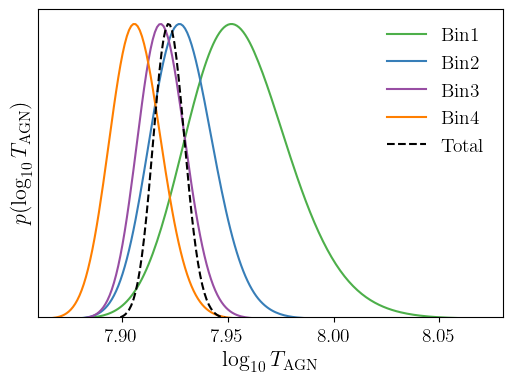

In [10]:
plt.figure(figsize=(6, 4))

labels = [r"${\rm Bin %d}$" % (i + 1) for i in range(4)]

for prob, colour, label in zip(probs.T, my_colours, labels):
    plt.plot(logTAGNs, prob, c=colour, label=label)

plt.plot(logTAGNs, probs.T[4], "k--", label=r"${\rm Total}$")

plt.xlabel(r"$\log_{10}T_{\rm AGN}$", fontsize=16)
plt.ylabel(r"$p(\log_{10}T_{\rm AGN})$", fontsize=16)
plt.legend(frameon=False, fontsize=14)
plt.xlim([7.86, 8.08])
plt.ylim([0.005, 1.05])
plt.yticks([])
plt.tick_params(axis="x", labelsize=14)

### Plot: all parameters

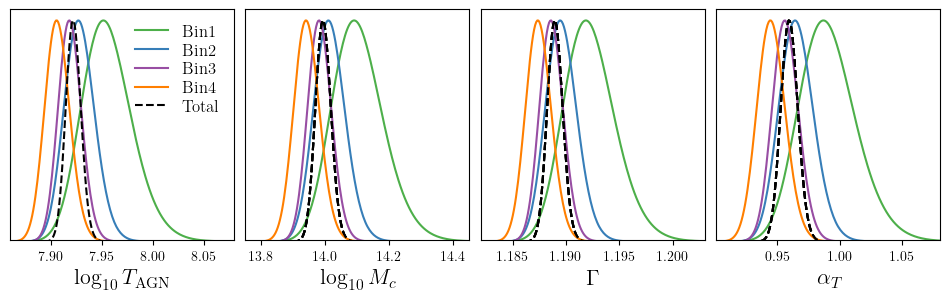

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3),
                         sharex=False, sharey=True)
plt.subplots_adjust(wspace=0.05)

labels = [r"${\rm Bin %d}$" % (i + 1) for i in range(4)]
for prob, colour, label in zip(probs.T, my_colours, labels):
    axes[0].plot(logTAGNs, prob, c=colour, label=label)
    axes[0].set_xlabel(r"$\log_{10}T_{\rm AGN}$", fontsize=16)

    axes[1].plot(lMcs, prob, c=colour, label=label)
    axes[1].plot(lMcs, probs.T[4], "k--")
    axes[1].set_xlabel(r"$\log_{10}M_c$", fontsize=16)

    axes[2].plot(gammas, prob, c=colour, label=label)
    axes[2].plot(gammas, probs.T[4], "k--")
    axes[2].set_xlabel(r"$\Gamma$", fontsize=16)

    axes[3].plot(alpha_Ts, prob, c=colour, label=label)
    axes[3].plot(alpha_Ts, probs.T[4], "k--")
    axes[3].set_xlabel(r"$\alpha_T$", fontsize=16)

axes[0].plot(logTAGNs, probs.T[4], "k--", label=r"${\rm Total}$")
axes[0].legend(frameon=False, fontsize=12, labelspacing=0.2)
axes[0].set_xlim([7.86, 8.08])
axes[1].set_xlim([13.75, 14.45])
axes[2].set_xlim([1.182, 1.203])
axes[3].set_xlim([0.901, 1.08])
for ax in axes:
    ax.set_ylim([0.005, 1.05])
    ax.set_yticks([])

plt.savefig("Plots/constraints_BAHAMAS.pdf", bbox_inches="tight")

### Parameter constraints

In [12]:
lTAGN = BAHAMAS["logTAGN"]

lc = rx.ROSATxLike(params_vary=["logTAGN"], bins=[0, 1, 2, 3])
ts = lc.get_model(logTAGN=lTAGN[np.argmax(probs[:, -1])])

for i, (p, bins, d) in enumerate(
    zip(probs.T,
        [[0], [1], [2], [3], [0, 1, 2, 3]],
        ["Bin 1", "Bin 2", "Bin 3", "Bin 4", "All bins"])):

    m = np.sum(p * lTAGN) / np.sum(p)
    s = np.sqrt(np.sum(p * lTAGN**2) / np.sum(p) - m**2)
    print(d, "\n", "\log_{10}T_{\\text{AGN}} =",
          f"%.3lf \\pm %.3lf" % (m, s))

    bf = lTAGN[np.argmax(p)]
    lc = rx.ROSATxLike(params_vary=["logTAGN"], bins=bins)
    theory = np.concatenate(lc.get_model(logTAGN=bf)).flatten()
    chi2 = np.dot(theory - lc.data,
                  np.dot(lc.inv_cov, theory - lc.data))
    pte = 1 - st.chi2.cdf(chi2, len(theory) - 1)
    print("\chi^2_{\\text{min}} =", chi2, "\n", "PTE =", pte)

    if i < 4:
        tt = ts[i]
        chi2 = np.dot(tt - lc.data,
                      np.dot(lc.inv_cov, tt - lc.data))
        pte = 1 - st.chi2.cdf(chi2, len(tt) - 1)
        print(chi2, pte, "\n")

Bin 1 
 \log_{10}T_{\text{AGN}} = 7.956 \pm 0.025
\chi^2_{\text{min}} = 9.795273299672552 
 PTE = 0.9924728271057129
11.980189745457075 0.9707751458594381 

Bin 2 
 \log_{10}T_{\text{AGN}} = 7.929 \pm 0.015
\chi^2_{\text{min}} = 13.47325493369167 
 PTE = 0.9409697017131865
13.67609407392159 0.9357727340285802 

Bin 3 
 \log_{10}T_{\text{AGN}} = 7.919 \pm 0.011
\chi^2_{\text{min}} = 10.239652662103714 
 PTE = 0.9896945600441941
10.349801100602342 0.9888972462907762 

Bin 4 
 \log_{10}T_{\text{AGN}} = 7.907 \pm 0.012
\chi^2_{\text{min}} = 11.99044182595552 
 PTE = 0.9706178625716366
11.373500950000082 0.979044398580256 

All bins 
 \log_{10}T_{\text{AGN}} = 7.922 \pm 0.007
\chi^2_{\text{min}} = 44.81458125942656 
 PTE = 0.9999973496510857


## 5. Comparison with external constraints

In [13]:
chains_des = loadMCSamples('chains_cobaya/desy3wl_k1000_hsc_baryons_nocuts_nla_nside4096_lmin20_lmin100_lmin300_GNG',
                    settings={'ignore_rows': 0.3})

chains_des.addDerived(chains_des['M_c'], name='lMc', label='\log_{10}M_c')

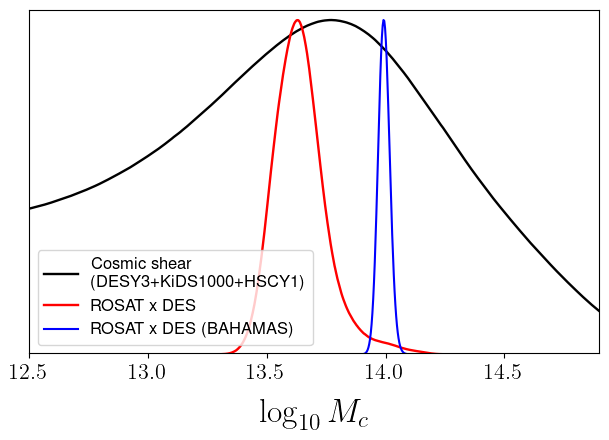

In [14]:
g = plots.get_single_plotter(width_inch=6)
g.settings.legend_fontsize = 12
g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 16
g.plot_1d([chains_des, chains_all], "lMc")
plt.plot(
    BAHAMAS["lMc"],
    np.exp(-0.5 * (BAHAMAS["chi2"][:, -1] - np.amin(BAHAMAS["chi2"][:, -1]))),
    "b-")
plt.xlim([12.5, 14.9])
plt.ylim([0.003, 1.03])
g.add_legend(
    legend_labels=[
        "Cosmic shear\n (DESY3+KiDS1000+HSCY1)",
        "ROSAT x DES",
        "ROSAT x DES (BAHAMAS)"],
    legend_loc="lower left")

plt.savefig("Plots/Mcfocus.pdf", bbox_inches="tight")